In [1]:
import ramCOH.functions as f
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = "./olivine/PI052-03_2021_11_29_15_43_43_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

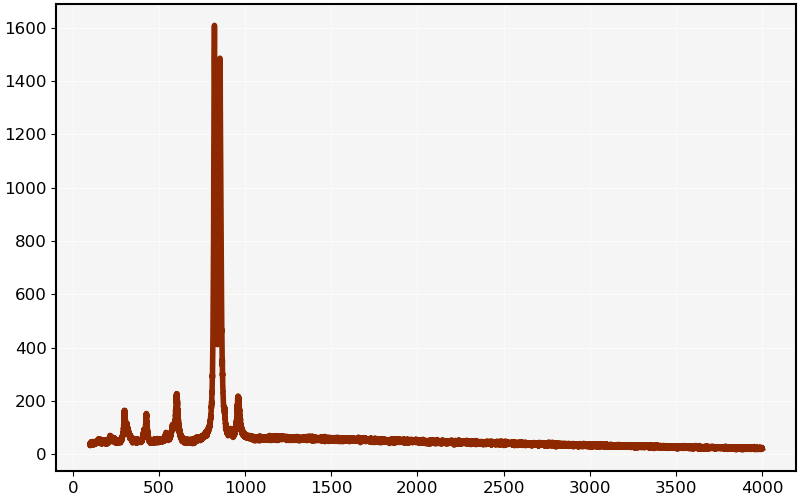

In [3]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [4]:
amplitudes, centers, widths = f._find_peak_parameters(x, y, 2)
centers, widths

(array([301.24 , 427.386, 603.791, 822.252, 854.462, 855.619, 958.912]),
 array([ 9.21766234,  7.86046849, 13.87388833,  8.54953445,  8.15467829,
         0.22146959, 15.15207696]))

In [5]:
ranges = f._get_peakFit_ranges(centers, widths, 4)
ranges

[[264.36935062387846, 338.11064937612156],
 [395.9441260270146, 458.82787397298546],
 [548.2954466893973, 659.2865533106028],
 [788.0538621840145, 887.0807131704208],
 [898.3036921670817, 1019.5203078329183]]

In [28]:
test = ranges[4]
xtrim, ytrim = f._trimxy_ranges(x, y, test)

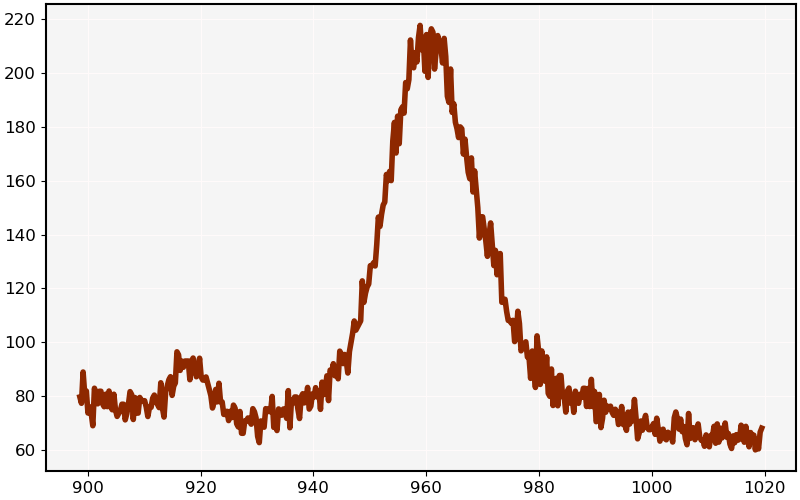

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.show()

In [30]:
noise, spline = f._calculate_noise(xtrim, ytrim)
noise

3.9926984363719527

In [41]:
params, r2, fit_noise = f.deconvolve_curve(xtrim, ytrim, noise_threshold= 1.3, prominence=2)
print(r2, fit_noise)

0.9991305942037466 4.840828934758663


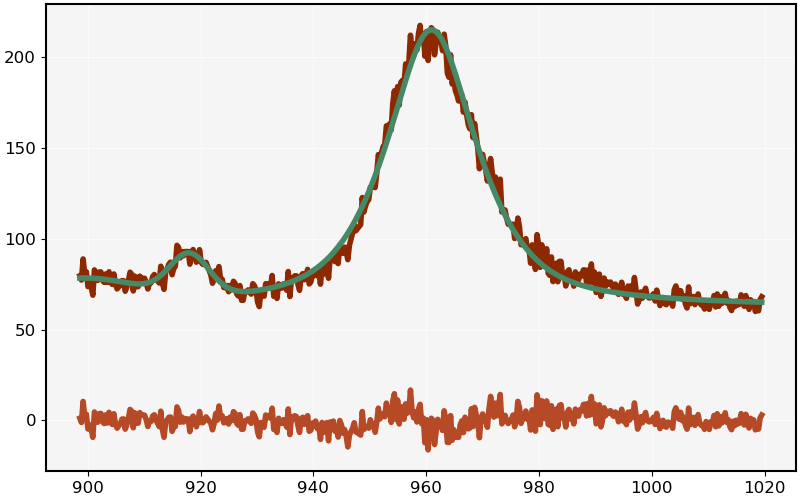

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.plot(xtrim, f.sum_GaussLorenz(xtrim, *params))
plt.plot(xtrim, ytrim - f.sum_GaussLorenz(xtrim, *params))
# plt.plot(xtrim, )
plt.show()

In [38]:
params

array([[9.17950191e+02, 9.58910819e+02, 8.98584000e+02, 9.65588352e+02,
        9.90090312e+02],
       [2.15230355e+01, 1.02754195e+02, 1.57347338e+01, 6.34068901e+01,
        3.32531625e+00],
       [3.35011893e+00, 6.76680622e+00, 1.57637922e+01, 1.16354248e+01,
        2.86542808e+00],
       [1.48314752e-01, 4.09024719e-01, 1.00000000e+00, 1.00000000e+00,
        8.92390416e-37],
       [6.37821940e+00, 6.27592112e+00, 6.52070541e+00, 5.14623616e+00,
        5.78328369e+00]])